In [6]:
#music instruments testing with chroma dtw 
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
#import stanford_mir; stanford_mir.init()
import os
import time
import fastdtw
#from madmom.features.onsets import RNNOnsetProcessor, OnsetPeakPickingProcessor

In [ ]:
def read_file(filename):
    x, sr = librosa.load(filename)
    return x, sr

def get_ioi(filename):
    probs = RNNOnsetProcessor() (filename)
    proc = OnsetPeakPickingProcessor(fps=100)
    onsets = proc(probs)
    ioi = numpy.diff(onsets)
    ioi = ioi/max(ioi)
    return ioi

def get_chroma(track):
    chroma = librosa.feature.chroma_cqt(track, n_chroma=12)
    return chroma

def get_mfcc(track):
    mfcc = librosa.feature.mfcc(track)
    return mfcc

def get_filtered_novelty(track):
    novelty = get_novelty(track)
    thresh = numpy.mean(novelty)
    novelty[novelty<thresh] = 0
    #ini = numpy.diff(novelty)
    return novelty
    
def get_novelty(track):
    hop_length = 512
    frame_length = 2048
    rmse = librosa.feature.rmse(track, frame_length=frame_length, hop_length=hop_length).flatten()
    #rmse_diff = numpy.zeros_like(rmse)
    #rmse_diff[1:] = numpy.diff(rmse)
    #energy_novelty = numpy.max([numpy.zeros_like(rmse_diff), rmse_diff], axis=0)
    #energy_novelty = energy_novelty/numpy.max(energy_novelty)
    #log_rmse = numpy.log1p(10*rmse)
    #log_rmse_diff = numpy.zeros_like(log_rmse)
    #log_rmse_diff[1:] = numpy.diff(log_rmse)
    #energy_novelty = numpy.max([numpy.zeros_like(log_rmse_diff), log_rmse_diff], axis=0)
    
    return  rmse

def get_dtw(chroma, chroma_reference):
    D, wp = librosa.core.dtw(chroma, chroma_reference, subseq = False) #subseq false: mn zewye la zewye 
    #cost, wp = fastdtw.fastdtw(chroma.T, chroma_reference.T)
    return D, wp
    #return cost, wp

def get_sliding_dtw(chroma, chroma_ref):
    f_len = len(chroma) #length of the hummed features (frames)
    r_len = len(chroma_ref) #length of the reference features
  
    min_result = 1000000
    results=[]
    
    for i in range(r_len - f_len +1):#r_len - f_len +1):
        if i%100 != 0:
            continue
        s_reference = chroma_ref[i:i+f_len] # get a window of a reference 
        scalar,_ = fastdtw.fastdtw(chroma.T, s_reference.T) #inner product
        result = scalar
        results.append(result)
        if result < min_result: 
            min_result = result
    
    
   # return max_result
    return min_result
    
    
    
#auto correlation 
def auto_correlation(x):
    x = x-x.mean() #below 0 
    r=numpy.correlate(x,x,mode='full')[0:len(x):]
    return r

def get_cost(D, wp): 
    cost = D[wp[0][0], wp[0][1]]
    return cost

    
def compare(track, reference):

    D, wp = get_dtw(track, reference)
    #cost, wp = get_dtw(track, reference)
    cost = get_cost(D, wp)
    
    return cost 

In [ ]:
allFiles = os.listdir('ChromaMidi') #get the names of the files inside folder 'database'
allCovers = os.listdir('songs-covers')

allResults = []

for i, humname in enumerate(allCovers):
    print(i/len(allCovers)*100, '%')
    humname =  r'songs-covers/' + humname #humname
    #track,_=read_file(humname)
    track,sr = read_file(humname)
    #hum = get_feature(track) #rmse
    hum = get_chroma(track)
    costs = numpy.zeros(len(allFiles)) #initialize the costs to zero
    results = []
    start_time = time.time()
    for idx, file in enumerate(allFiles): #iterate over all files in the database returns index and element 
        filename = r'ChromaMidi/' + file #path to each file 
        reference=numpy.load(filename)
        cost = compare(hum, reference) #compare the hummed query with the reference song
        costs[idx] = cost #put the cost in the array
        results.append([cost, file])

    results.sort()
    
    allResults.append([humname, results])
    
    end_time = time.time()
    print("time taken:", end_time - start_time, "sec")



0.0 %
time taken: 502.6213219165802 sec
10.0 %


In [ ]:
allResults = numpy.array(allResults)

In [ ]:
i = 1
print(allResults[i][0])
for j, r in enumerate(allResults[i][1]):
    print(j,r)

In [ ]:
#print(costs)

In [ ]:
#print(allFiles)

In [ ]:
#for r in results:
 #   print(r)

In [ ]:
#plt.bar(allFiles, costs)

In [ ]:
#match = numpy.argmin(costs) #get the minimum cost 
#print(allFiles[match]) #print the filename of the minimal cost
#print(costs[match])

In [ ]:
#results.sort()
#for i, result in enumerate(results):
#    print(i, result)

In [7]:
def read_file(filename):
    x, sr = librosa.load(filename)
    return x, sr

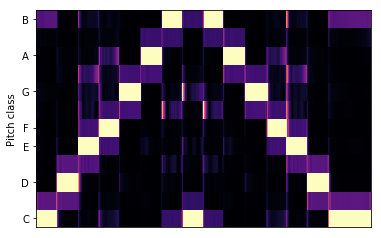

In [10]:
filename=r'two.wav'
ref, sr=read_file(filename)
chroma = librosa.feature.chroma_stft(ref)#[:int(sr*30)])
librosa.display.specshow(chroma, y_axis='chroma')
